In [157]:
# Importamos las bibliotecas que utilizaremos 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D

Problema 1:

Resuelve numéricamente la ecuación de reacción-difusión para el caso de condiciones de frontera tipo Dirichlet por el método de BTCS, con condición inicial $u(x,0)=0$, y condiciones a la frontera $u(0,t)=1$ y $u(1,t)=2$, para un tiempo $t=0,..,1$.

Muestra una gráfica de la evolución temporal de la reacción difusión de los compuestos.

In [158]:
#Tomaremos los puntos para la parte en x 
# Nosotros le daremos un espaciado de 150
M= 150

# Ahora haremos un proceso similar para la parte del tiempo 
# El cual le daremos un valor de 300

N= 300

# Ahora pondremos cuales son las posiciones iniciales o caracterisitcas con las cuales comenzaremos el analisis
# Con un x inicial en 0
x0 = 0

# Denotando un Xl = 1 
xL=1

# El diferencial de x esta dado por: 

dx=(xL-x0)/(M-1)



In [159]:
# Se hara un proceso similar para el tiempo el cual: 
# Tendremos un tiempo inicial de t = 0 
t0 = 0

# El tiempo final sera de 1 
tF = 1

# El diferencial de tiempo esta dado por: 
dt=(tF-t0)/(N-1)

#Coeficiente de difución
D = 1

#Coeficiente de reacción 
alpha = -1

r=dt*D/dx**2
s=dt*alpha

In [160]:
# Para esta nueva seccion 
xspan=np.linspace(x0,xL,M)

tspan=np.linspace(t0,tF,N)

main_diag=(1+2*r-s)*np.ones((1,M-2))
off_diag=-r*np.ones((1,M-3))

a=main_diag.shape[1]

diagonals=[main_diag, off_diag, off_diag]

A=sparse.diags(diagonals,[0,-1,1], shape=(a,a)).toarray()

#Matriz de inicialización 
U=np.zeros((M,N))

#Condición inicial
U[:,0]=0.0

#Condiciones de frontera de Dirichlet
U[0,:]=1.0
U[-1,:]=2.0

for k in range(1,N):
  c=np.zeros((M-4,1)).ravel()
  b=np.asarray([r*U[0,k],r*U[-1,k]])
  b1=np.insert(b,1,c)
  b2=np.array(U[1:M-1,k-1])

  B=b1+b2

  U[1:M-1,k]=np.linalg.solve(A,B)




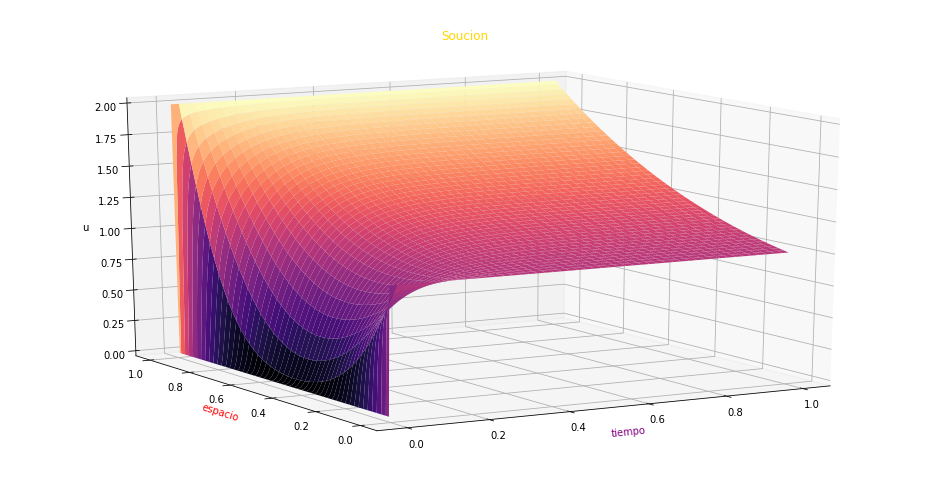

In [161]:
#Surface plot


X,T=np.meshgrid(tspan,xspan)
fig=plt.figure(figsize=(13,7))
ax=fig.gca(projection='3d')
surf=ax.plot_surface(X,T,U,linewidth=0,cmap=cm.magma, color = "purple")

#Graficamos
ax.set_title('Soucion', color = "gold")
ax.set_xlabel('tiempo',color = "purple")
ax.set_ylabel('espacio', color = "r")
ax.set_zlabel('u')
plt.tight_layout()
ax.view_init(elev=15, azim=-120)
plt.show()


Problema 2:

Ahora supondremos que se colocan reguladores de presión, que permiten flujo de los gases desde los reservorios hacia el tubo inicialmente vacío $u(x,0) = 0$. En $x=0$, el flujo de gas es $\partial u/\partial x (0,t) = 0.1$ y en $x=1$ el flujo $\partial u/\partial x (1,t) = 0.2$.

Se pide realizar una simulación numérica de este escenario para $=0,..,10$.

In [162]:
# Comenzamos dando cuales son los espaciados para x 
# Nosotros le daremos 174
Ag = 174

# Tomaremos los puntos para la parte del tiempo 
# Nosotros le daremos 250

rv = 250



In [163]:
# Las condiciones iniciales para la parte espacial 
# Para x comenzaremos en 0 
x0=0

# La parte final sera en 1 
xL=1

# El diferencial de x 
dx=(xL-x0)/(Ag-1)

# Las condiciones iniciales para la parte temporal 
# Comenzaremos con un tiempo inicial de 0 
t0 = 0

# Terminaremos con un tiempo final de 1 
tF=10

# Por ultimo el diferencial de tiempo esta dado por: 
dt=(tF-t0)/(rv-1)

#Coeficiente de difución
D = 1

#Coeficiente de reacción 
alpha=-1

r = dt*D/dx**2
s = dt*alpha
p = 1+2*r-s

In [164]:
xspan=np.linspace(x0,xL,Ag)
tspan=np.linspace(t0,tF,rv)

main_diag=p*np.ones((1,Ag))
off_diag=-r*np.ones((1,Ag-1))

a=main_diag.shape[1]

diagonals=[main_diag, off_diag, off_diag]

A=sparse.diags(diagonals,[0,-1,1], shape=(a,a)).toarray()
A[0,1]=-2*r
A[Ag-1,Ag-2]=-2*r

#Matriz de inicialización 
U=np.zeros((Ag,rv))

#Condición inicial
U[:,0]=0.0

#Condiciones Neumann
f=np.ones([rv+1,1])*0.1
g=np.ones([rv+1,1])*0.3

In [165]:
for k in range(1,rv):
  c=np.zeros((Ag-2,1)).ravel()
  b=np.asarray([2*r*dx*f[k],2*r*dx*g[k]])
  b1=np.insert(b,1,c)
  b2=np.array(U[0:Ag,k-1])

  B=b1+b2

  U[0:Ag,k]=np.linalg.solve(A,B)


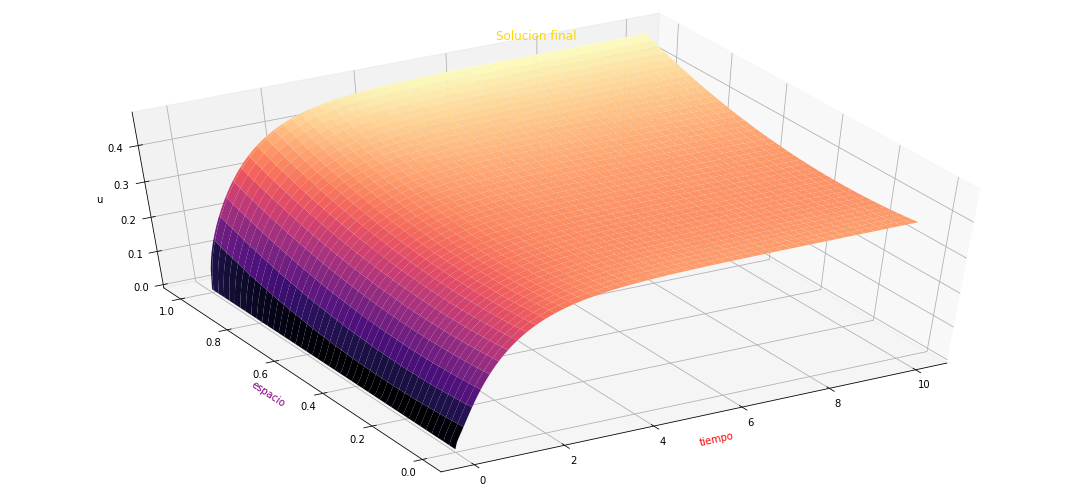

In [166]:
# La part de la superficie de nuestra grafica 
X,T=np.meshgrid(tspan,xspan)
fig=plt.figure(figsize=(15,7))
ax=fig.gca(projection='3d')
surf=ax.plot_surface(X,T,U,linewidth = 2 ,cmap=cm.magma)

#Graficamos
ax.set_title('Solucion final', color = "gold")
ax.set_xlabel('tiempo', color = "red")
ax.set_ylabel('espacio', color = "purple")
ax.set_zlabel('u')
plt.tight_layout()
ax.view_init( elev = 50, azim = -120)
plt.show()


Problema 3:

¿Que pasaría en el caso de que se mezclaran dos gases que no reaccionan entre si, como sería mezclar dos recipientes con el mismo tipo de gas (el coeficiente de reacción $\alpha=0$)?.

Suponga que inicialmente el tubo está vacío $u(x,0)=0$ y la concentración en $u(0,t)=1$ y $u(1,t)=2$.

Resuelva numéricamente este caso.

In [167]:
# Comenzamos para el espaciado de x 
# Nosotros le daremos 100

M = 100

#Para la parte del tiempo sera: 
# N = 200 

N = 200

# Las condiciones iniciales para el espacio sera de 0
x0 = 0

# La parte final de esa componente sera 1  
xL=1

# El diferencial de tiempo estara dado por:

dx=(xL-x0)/(M-1)

# Las condiciones iniciales para el tiempo estaran dadas por: 
# Primero con una condicion inicil de 0
t0 = 0

# Para la parte final definiremos 
tF = 3

#  El diferencial de esa componente 
dt=(tF-t0)/(N-1)

#Coeficiente de difución
D=1
#Coeficiente de reacción 
alpha=0

r=dt*D/dx**2

s=dt*alpha


In [168]:

xspan=np.linspace(x0,xL,M)
tspan=np.linspace(t0,tF,N)

main_diag=(1+2*r-s)*np.ones((1,M-2))
off_diag=-r*np.ones((1,M-3))

a=main_diag.shape[1]

diagonals=[main_diag, off_diag, off_diag]

A=sparse.diags(diagonals,[0,-1,1], shape=(a,a)).toarray()

#Matriz de inicialización 
U=np.zeros((M,N))

#Condición inicial
U[:,0]=0.0

#Condiciones de frontera de Dirichlet
U[0,:]=1.0
U[-1,:]=2.0
for k in range(1,N):
  c=np.zeros((M-4,1)).ravel()
  b=np.asarray([r*U[0,k],r*U[-1,k]])
  b1=np.insert(b,1,c)
  b2=np.array(U[1:M-1,k-1])

  B=b1+b2

  U[1:M-1,k]=np.linalg.solve(A,B)

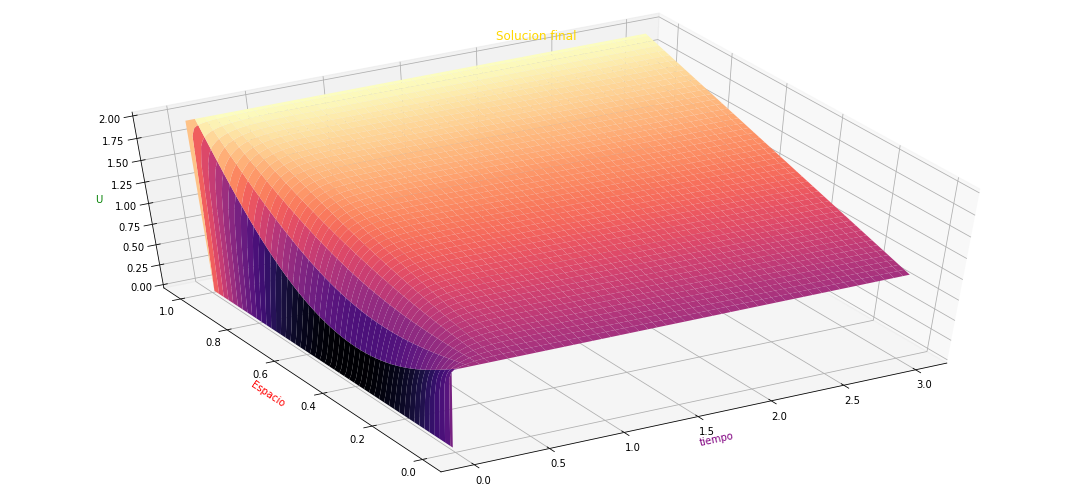

In [169]:
#Surface plot
X,T=np.meshgrid(tspan,xspan)
fig=plt.figure(figsize=(15,7))
ax=fig.gca(projection='3d')
surf=ax.plot_surface(X,T,U,linewidth = 2 ,cmap=cm.magma)

#Graficamos
ax.set_title("Solucion final", color = "gold")
ax.set_xlabel('tiempo', color = "purple")
ax.set_ylabel('Espacio', color = "r")
ax.set_zlabel('U', color = "g")
plt.tight_layout()
ax.view_init( elev = 50, azim= -120)
plt.show()